<a href="https://colab.research.google.com/github/GraceOluwafemi/Msc-Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

#Libaries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Libraries for Data Preprocessing
import glob
from numpy import sort
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.gridspec as gridspec
from xgboost import plot_importance, to_graphviz
from sklearn.model_selection import StratifiedKFold


# Importing ML Model packages
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV
import sklearn.neighbors
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification


# Libraries for measuring accuracy
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, matthews_corrcoef, roc_curve, make_scorer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text



In [ ]:
# Load the data from a CSV file
data = pd.read_csv("https://raw.githubusercontent.com/GraceOluwafemi/Msc-Project/main/diabetes_data.csv")

# Print the first few rows of the data
print (data.head())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

In [ ]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data = data.rename(columns={'Diabetes_binary': 'Diabetes_Status'})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_Status       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
data['Diabetes_Status'] = data['Diabetes_Status'].astype(int)
print (data.head())

   Diabetes_Status  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

In [ ]:
data.describe()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
data.isna().sum()

Diabetes_Status         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
data['Diabetes_Status'].value_counts()

0    218334
1     35346
Name: Diabetes_Status, dtype: int64

**Exploratory Data Analysis**

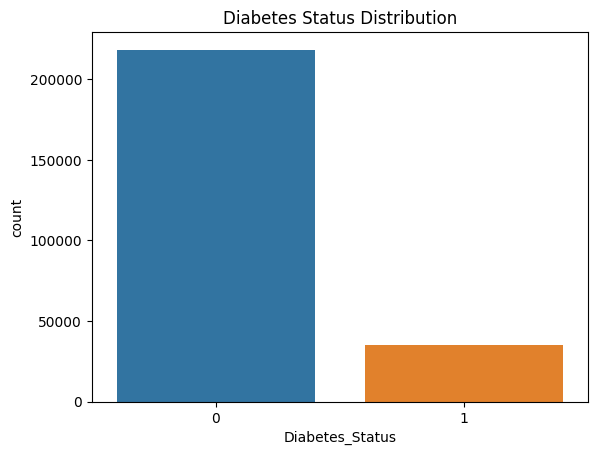

In [ ]:
# Class distribution
sns.countplot(x='Diabetes_Status', data=data)
plt.title('Diabetes Status Distribution')
plt.show()

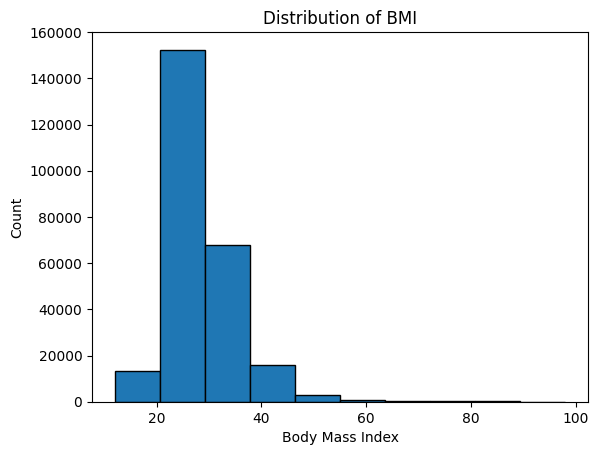

In [ ]:
# Generate the histogram
plt.hist(data['BMI'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Body Mass Index')
plt.ylabel('Count')
plt.title('Distribution of BMI')

# Show the histogram
plt.show()

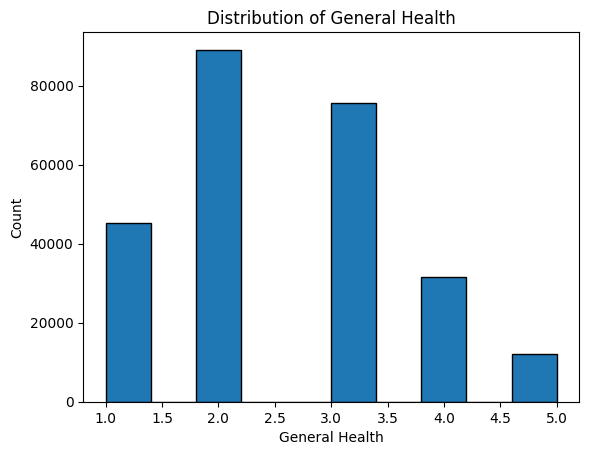

In [ ]:
# Generate the histogram
plt.hist(data['GenHlth'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('General Health')
plt.ylabel('Count')
plt.title('Distribution of General Health')

# Show the histogram
plt.show()

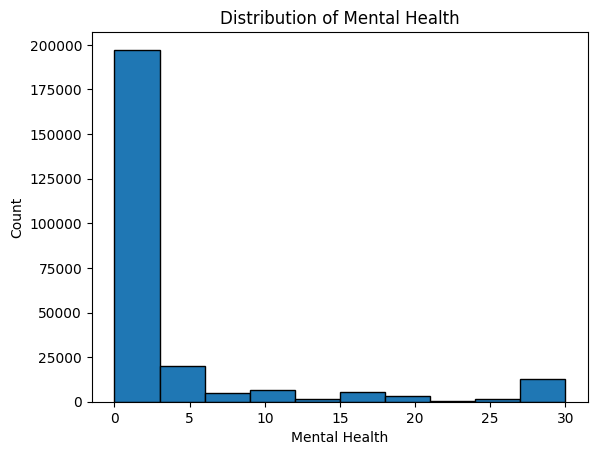

In [ ]:
# Generate the histogram
plt.hist(data['MentHlth'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Mental Health')
plt.ylabel('Count')
plt.title('Distribution of Mental Health')

# Show the histogram
plt.show()

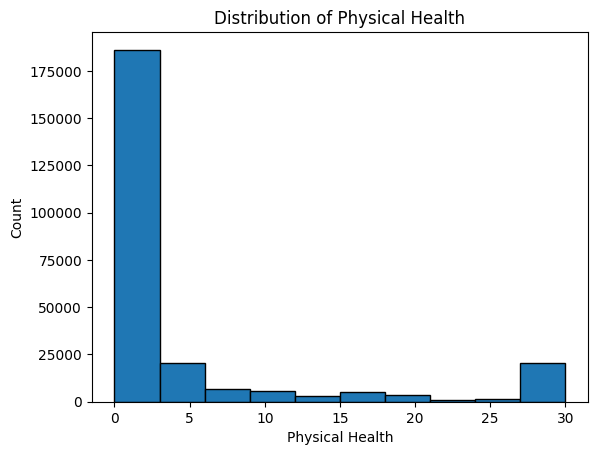

In [ ]:
# Generate the histogram
plt.hist(data['PhysHlth'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Physical Health')
plt.ylabel('Count')
plt.title('Distribution of Physical Health')

# Show the histogram
plt.show()

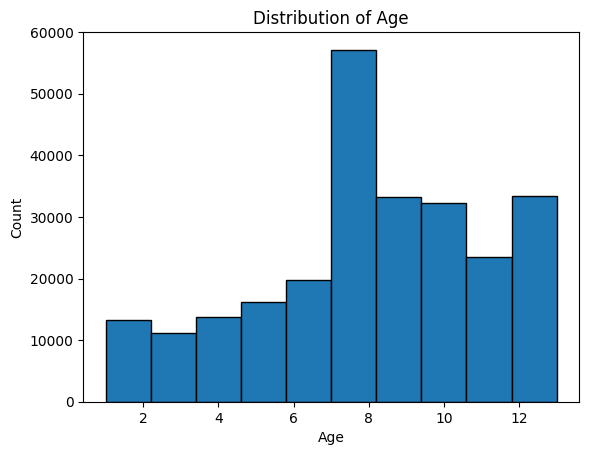

In [ ]:
# Generate the histogram
plt.hist(data['Age'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

# Show the histogram
plt.show()

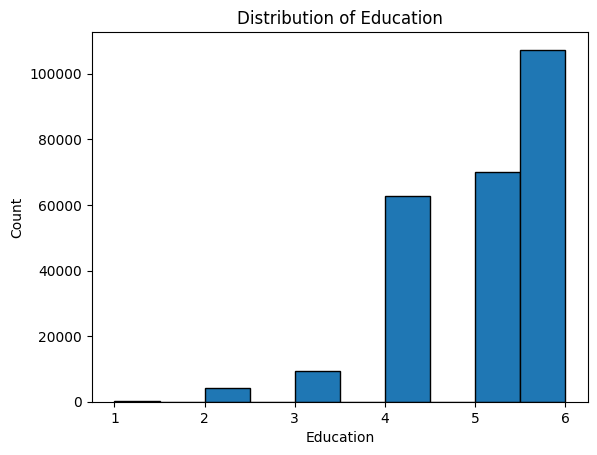

In [ ]:
# Generate the histogram
plt.hist(data['Education'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')

# Show the histogram
plt.show()

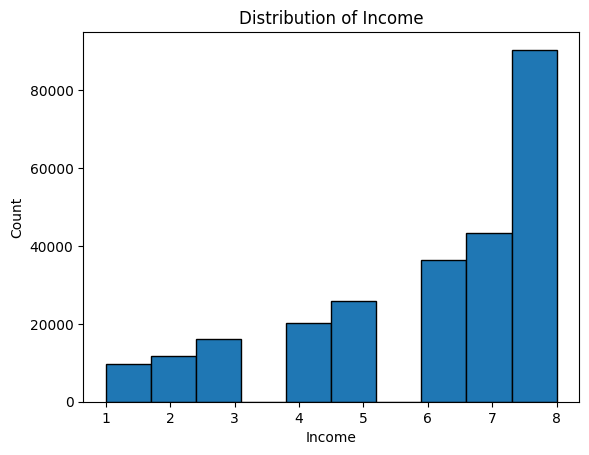

In [ ]:
# Generate the histogram
plt.hist(data['Income'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')

# Show the histogram
plt.show()

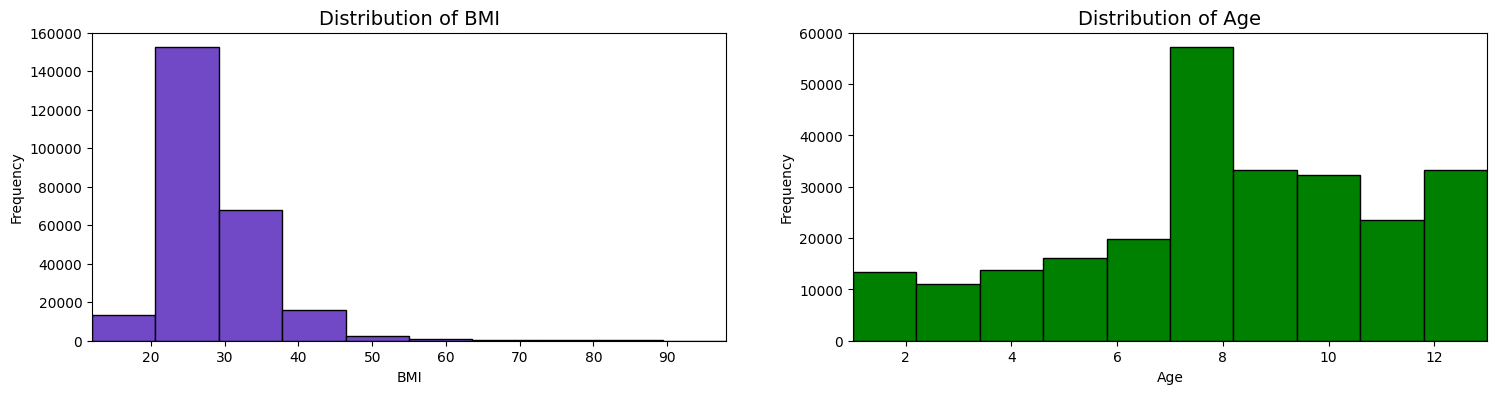

In [ ]:


# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Extract the 'BMI' and 'Age' columns
BMI = data['BMI'].values
Age = data['Age'].values

# Plot the histogram for 'BMI'
ax[0].hist(BMI, bins=10, edgecolor='black', color='#7149C6')
ax[0].set_title('Distribution of BMI', fontsize=14)
ax[0].set_xlabel('BMI')
ax[0].set_ylabel('Frequency')
ax[0].set_xlim([min(BMI), max(BMI)])  # Set x-axis limits for BMI

# Plot the histogram for 'Age'
ax[1].hist(Age, bins=10, edgecolor='black', color='green')
ax[1].set_title('Distribution of Age', fontsize=14)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Frequency')
ax[1].set_xlim([min(Age), max(Age)])  # Set x-axis limits for Age

# Remove gridlines
for axes in ax:
    axes.grid(False)

# Adjust spacing
#plt.tight_layout()

# Display the plot
plt.show()


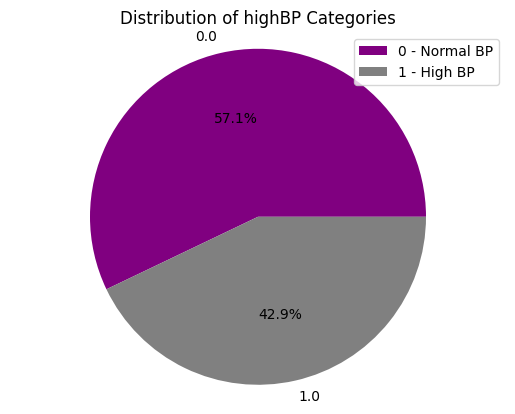

In [ ]:
# Count the occurrences of each category
category_counts = data['HighBP'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['purple', 'grey'])

# Add legend
legend_labels = ['0 - Normal BP', '1 - High BP']
plt.legend(legend_labels, loc='best')

# Set title and aspect ratio
plt.title('Distribution of highBP Categories')
plt.axis('equal')

# Display the chart
plt.show()


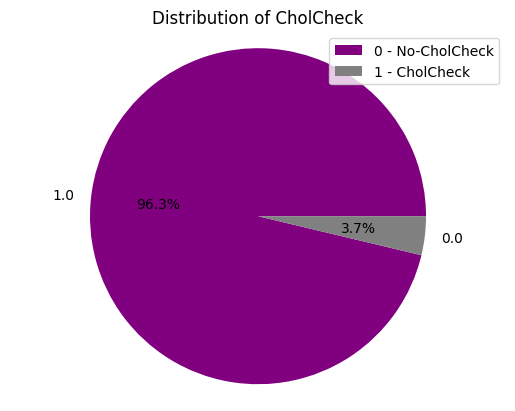

In [ ]:
# Count the occurrences of each category
category_counts = data['CholCheck'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['purple', 'grey'])

# Add legend
legend_labels = ['0 - No-CholCheck', '1 - CholCheck']
plt.legend(legend_labels, loc='best')

# Set title and aspect ratio
plt.title('Distribution of CholCheck')
plt.axis('equal')

# Display the chart
plt.show()

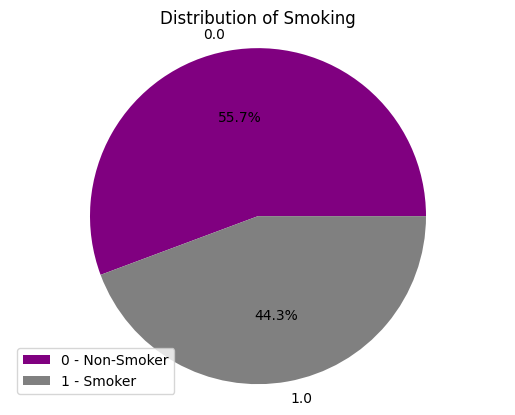

In [ ]:
# Count the occurrences of each category
category_counts = data['Smoker'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['purple', 'grey'])

# Add legend
legend_labels = ['0 - Non-Smoker', '1 - Smoker']
plt.legend(legend_labels, loc='best')

# Set title and aspect ratio
plt.title('Distribution of Smoking')
plt.axis('equal')

# Display the chart
plt.show()

**Handling Outliers**

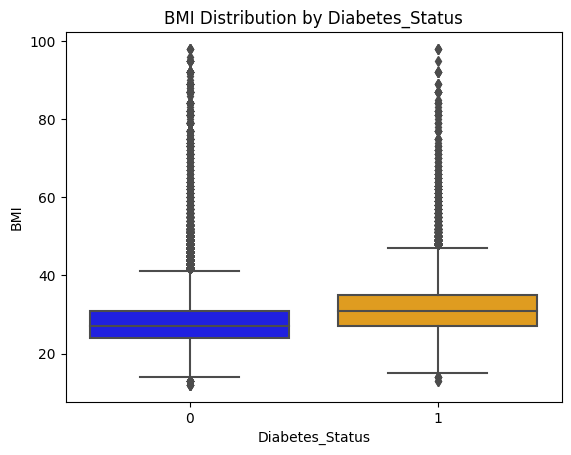

In [ ]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='BMI', data=data, palette=['blue', 'orange'])
plt.title('BMI Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('BMI')

# Display the plot
plt.show()


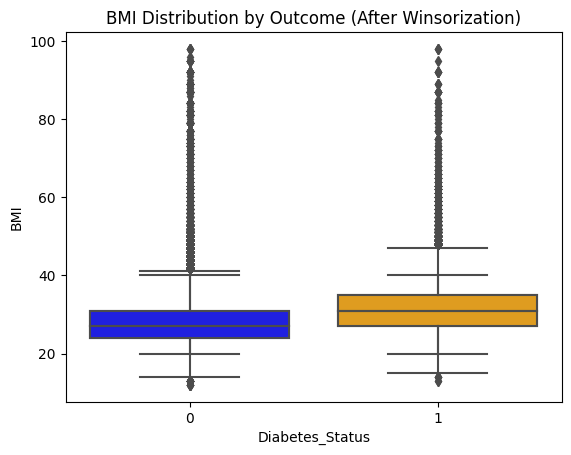

In [ ]:

# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='BMI', data=data, palette=['blue', 'orange'])
plt.title('BMI Distribution by Outcome')
plt.xlabel('Diabetes_Status')
plt.ylabel('BMI')

# Winsorize outliers
winsorized_bmi = winsorize(data['BMI'], limits=[0.05, 0.05])
data['BMI'] = winsorized_bmi

# Display the plot with updated boxplot
sns.boxplot(x='Diabetes_Status', y='BMI', data=data, palette=['blue', 'orange'])
plt.title('BMI Distribution by Outcome (After Winsorization)')
plt.xlabel('Diabetes_Status')
plt.ylabel('BMI')

# Display the plot
plt.show()


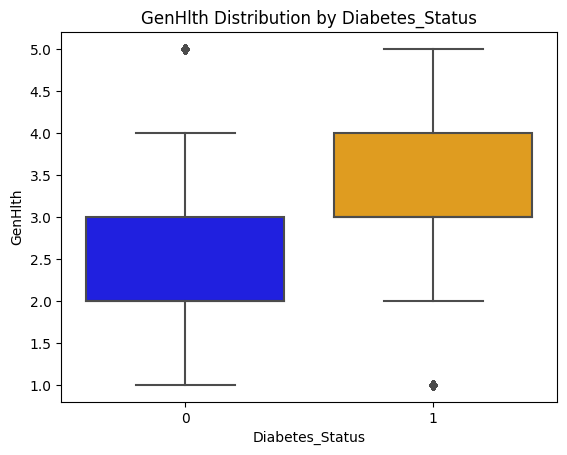

In [ ]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='GenHlth', data=data, palette=['blue', 'orange'])
plt.title('GenHlth Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('GenHlth')

# Display the plot
plt.show()

In [ ]:
# Replace values in the 'GenHlth' column with mean value of 2.5 where 'Diabetes_Status' is equal to 0 and 'GenHlth' is greater than 4
data.loc[(data["Diabetes_Status"] == 0) & (data["GenHlth"] > 4), 'GenHlth'] = 2.5

# Replace values in the 'GenHlth' column with mean value of 2.5 where 'Diabetes_Status' is equal to 0 and 'GenHlth' is less than 1.5
data.loc[(data["Diabetes_Status"] == 1) & (data["GenHlth"] < 1.5), 'GenHlth'] = 2.5

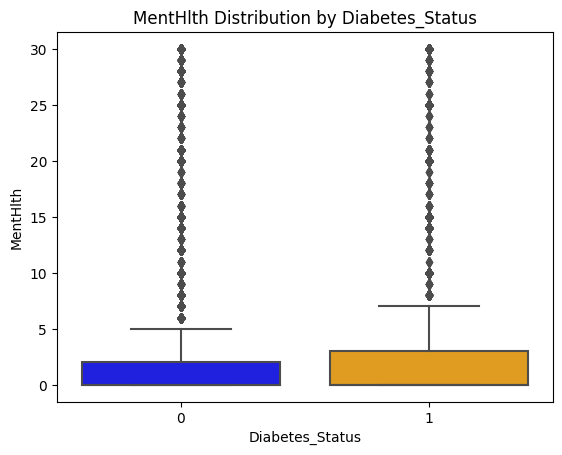

In [ ]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='MentHlth', data=data, palette=['blue', 'orange'])
plt.title('MentHlth Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('MentHlth')

# Display the plot
plt.show()

In [ ]:
# Replace values in the 'MentHlth' column with mean value of 3.2 where 'Diabetes_Status' is equal to 0 and 'MentHlth' is greater than 4
data.loc[(data["Diabetes_Status"] == 0) & (data["MentHlth"] > 5), 'MentHlth'] = 3.2

# Replace values in the 'MentHlth' column with mean value of 3.2 where 'Diabetes_Status' is equal to 1 and 'MentHlth' is greater than 6
data.loc[(data["Diabetes_Status"] == 1) & (data["MentHlth"] > 6), 'MentHlth'] = 3.2

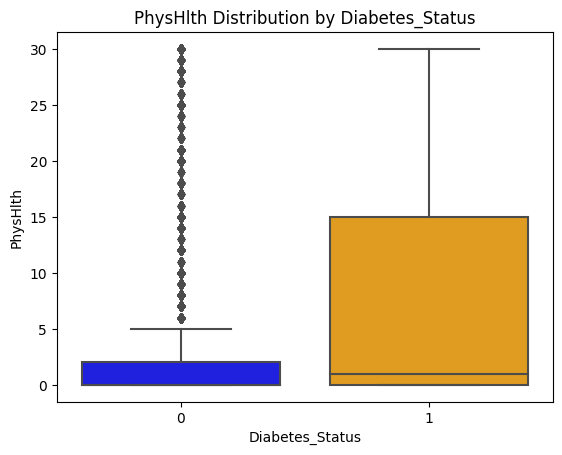

In [ ]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='PhysHlth', data=data, palette=['blue', 'orange'])
plt.title('PhysHlth Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('PhysHlth')

# Display the plot
plt.show()

In [ ]:
# Replace values in the 'PhysHlth' column with mean value of 4.4 where 'Diabetes_Status' is equal to 0 and 'PhysHlth' is greater than 5
data.loc[(data["Diabetes_Status"] == 0) & (data["PhysHlth"] > 5), 'PhysHlth'] = 4.4



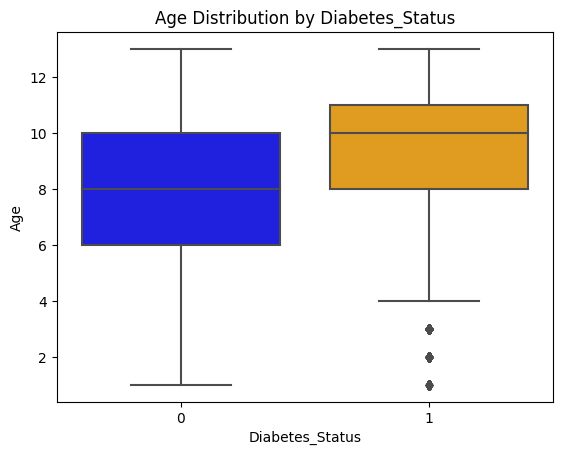

In [ ]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='Age', data=data, palette=['blue', 'orange'])
plt.title('Age Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('Age')

# Display the plot
plt.show()

In [ ]:
# Replace values in the 'Age' column with mean value of 8 where 'Diabetes_Status' is equal to 1 and 'Age' is less than 4
data.loc[(data["Diabetes_Status"] == 1) & (data["Age"] < 4), 'Age'] = 8

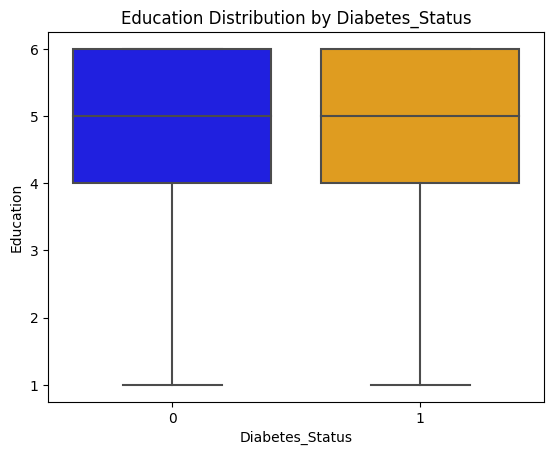

In [ ]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='Education', data=data, palette=['blue', 'orange'])
plt.title('Education Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('Education')

# Display the plot
plt.show()

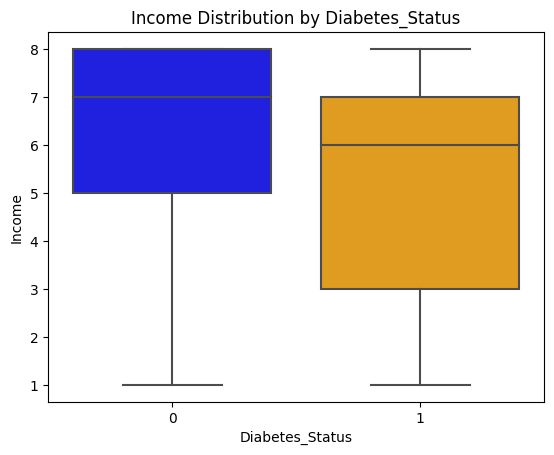

In [ ]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='Income', data=data, palette=['blue', 'orange'])
plt.title('Income Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('Income')

# Display the plot
plt.show()

Feature Selection

In [ ]:
y = data.Diabetes_Status
x = data.drop(["Diabetes_Status"],axis = 1)
columns = x.columns.tolist()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# Create a Random Forest classifier (or any other classifier you prefer)
clf = RandomForestClassifier()

# Create an RFE object with the Random Forest classifier as the estimator
rfe = RFE(estimator=clf, n_features_to_select=6)  # Specify the desired number of features to select

# Fit RFE on the training data
rfe.fit(X_train, Y_train)

# Get the selected features and their rankings
selected_features = X_train.columns[rfe.support_]
feature_rankings = rfe.ranking_

# Print the selected features and their rankings
print("Selected features:", selected_features)
print("Feature rankings:", feature_rankings)

Selected features: Index(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income'], dtype='object')
Feature rankings: [ 3  8 16  1  4 13 11  6  5  9 15 14 12  1  1  1  7 10  1  2  1]


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Algorithm Modelling

In [ ]:
# Create Logistics Regression classifier
lg = LogisticRegression(solver='liblinear')

# Train the classifier
lg.fit(X_train, Y_train)

# Make predictions on the testing set
y_pred_lg = lg.predict(X_test)

y_pred_lg1 = lg.predict_proba(X_test)[:, 1]
fpr_lg, tpr_lg, thresholds_lg = roc_curve(Y_test, y_pred_lg1)
auc_lg = roc_auc_score(Y_test, y_pred_lg1)

# Evaluate the model
print('Accuracy:', accuracy_score(Y_test, y_pred_lg))
print('Confusion Matrix:', confusion_matrix(Y_test, y_pred_lg))

Accuracy: 0.897469252601703
Confusion Matrix: [[43146   593]
 [ 4609  2388]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Create Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, Y_train)

# Make predictions on the testing set
y_pred_nb = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred_nb)
confusion_mat = confusion_matrix(Y_test, y_pred_nb)

print('Accuracy:', accuracy)
print('Confusion Matrix:', confusion_mat)


Accuracy: 0.8120663828445286
Confusion Matrix: [[37257  6482]
 [ 3053  3944]]


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

# Create XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, Y_train)

# Make predictions on the testing set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred_xgb)
confusion_mat = confusion_matrix(Y_test, y_pred_xgb)

print('Accuracy:', accuracy)
print('Confusion Matrix:', confusion_mat)


Accuracy: 0.9144394512771996
Confusion Matrix: [[43274   465]
 [ 3876  3121]]


In [ ]:
from imblearn.under_sampling import OneSidedSelection
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


# Create the one-sided selection pipeline
one_sided_pipeline = Pipeline([
    ('undersample', OneSidedSelection(n_neighbors=1, n_seeds_S=200)),
    ('oversample', SMOTE(random_state=42)),
])

# Apply one-sided selection on the training set
X_train_res, y_train_res = one_sided_pipeline.fit_resample(X_train, Y_train)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the resampled training data
model.fit(X_train_res, y_train_res)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
confusion_mat = confusion_matrix(Y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:', confusion_mat)


Accuracy: 0.7727846105329549
Confusion Matrix: [[33837  9902]
 [ 1626  5371]]


In [ ]:
from sklearn.neighbors import NearestNeighbors
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Perform ENN undersampling
enn = EditedNearestNeighbours(sampling_strategy='auto')
X_train_enn, y_train_enn = enn.fit_resample(X_train, Y_train)

# Perform SMOTE oversampling
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train_enn, y_train_enn)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the resampled training data
model.fit(X_train_res, y_train_res)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
confusion_mat = confusion_matrix(Y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:', confusion_mat)
